<center><h1>Saloni_Fnu_HW6</h1></center>

Name: Fnu Saloni
<br>
Github Username: fnusaloni
<br>
USC ID: 3175644840

## 1. Tree-Based Methods

Import packages

In [4]:
import pandas as pd
from io import StringIO
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
import math
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from matplotlib.colors import ListedColormap



import warnings
warnings.filterwarnings("ignore")

### (a) Download the APS Failure data

In [7]:
# defining a function to load and clean the dataset
def downloadData(filepath):
    # opening the file and skipping the first 20 lines
    with open(filepath, 'r') as f:
        lines = f.readlines()[20:]
    
    # joining remaining lines into a single string
    from io import StringIO
    clearData = ''.join(lines)

    # reading CSV from string and handling missing values
    return pd.read_csv(StringIO(clearData), na_values='na')

trainDs = downloadData('../data/aps_failure_training_set.csv')

testDs = downloadData('../data/aps_failure_test_set.csv')

testDs


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [8]:
trainDs

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [11]:
# converting labels in the dataset to binary values
trainDs.iloc[:, 0] = trainDs.iloc[:, 0].map({'neg': 0, 'pos': 1})

testDs.iloc[:, 0] = testDs.iloc[:, 0].map({'neg': 0, 'pos': 1})


In [13]:
# extracting features
X_train = trainDs.iloc[:, 1:]

Y_train = trainDs.iloc[:, 0]

X_test = testDs.iloc[:, 1:]

Y_test = testDs.iloc[:, 0]

X_train


,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [15]:
Y_train

0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: class, Length: 60000, dtype: object

In [17]:
X_test

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [19]:
Y_test

0        0
1        0
2        0
3        0
4        0
        ..
15995    0
15996    0
15997    0
15998    0
15999    0
Name: class, Length: 16000, dtype: object

### (b) Data Preparation

#### (i) Research what types of techniques are usually used

There are several techniques to impute data. Here are some common imputation methods:
Mean Imputation- 
We replace missing values with the average (mean) of that column. It’s easy to apply and works well when values in that column are close to each other (not too spread out).

Median Imputation- 
This method uses the middle value (median) of the column to fill in missing spots. It's helpful when the column has a few outliers (very high or low numbers) that could affect the mean.

Mode Imputation- 
For categorical or repeated values, we use the most common value (called the mode). It works best when a particular value appears more often than others.

K-Nearest Neighbors (KNN) Imputation- 
This method finds the most similar rows in the dataset and uses their values to fill in the missing one. It’s a bit slower but can be more accurate because it considers patterns in the data.

Regression Imputation- 
We build a small prediction model using other columns to guess the missing value. For example, if one sensor value is missing, we can predict it using the values from other sensors.

Hot Deck Imputation- 
This method picks a value from a similar row in the dataset and uses it to fill the missing spot. It’s kind of like copying from someone with similar features.


In [24]:
# filling missing values in features using column-wise mean
X_trainFilled = X_train.fillna(X_train.mean())

X_testFilled = X_test.fillna(X_train.mean())

X_trainFilled

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.713189,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.713189,0.000000e+00,190620.639314,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.713189,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.713189,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,0.713189,6.640000e+02,186.000000,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286,0.713189,2.130707e+09,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112,0.000000,2.130706e+09,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292,0.713189,2.130706e+09,494.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


#### (ii) Calculate the coefficient of variation

In [27]:
# defining a function to calculate coefficient of variation for a series
def calCV(series):
    meanVal = series.mean()
    stdVal = series.std()
    return stdVal / meanVal if meanVal != 0 else float('nan')

cvVal = X_trainFilled.apply(calCV)

meanList = {col: X_trainFilled[col].mean() for col in X_trainFilled.columns}

stdList = {col: X_trainFilled[col].std() for col in X_trainFilled.columns}

# creating a DataFrame 
cvDs = pd.DataFrame({
    'mean': pd.Series(meanList),
    'std': pd.Series(stdList),
    'cv': cvVal
})

cvDs


,mean,std,cv
aa_000,5.933650e+04,1.454301e+05,2.450938
ab_000,7.131885e-01,1.660588e+00,2.328400
ac_000,3.560143e+08,7.724678e+08,2.169767
ad_000,1.906206e+05,3.504515e+07,183.847620
ae_000,6.819130e+00,1.581420e+02,23.190937
...,...,...,...
ee_007,3.462714e+05,1.718366e+06,4.962483
ee_008,1.387300e+05,4.469894e+05,3.222010
ee_009,8.388915e+03,4.720424e+04,5.626979
ef_000,9.057895e-02,4.268529e+00,47.124953


In [29]:
# applying the function to testing features
cvVal_test = X_testFilled.apply(calCV)

# calculating mean of each test feature
meanList_test = {col: X_testFilled[col].mean() for col in X_testFilled.columns}

# calculating standard deviation of each test feature
stdList_test = {col: X_testFilled[col].std() for col in X_testFilled.columns}

# creating a DataFrame for test set
cvDs_test = pd.DataFrame({
    'mean': pd.Series(meanList_test),
    'std': pd.Series(stdList_test),
    'cv': cvVal_test
})

cvDs_test


,mean,std,cv
aa_000,6.799698e+04,5.035350e+05,7.405254
ab_000,7.265718e-01,1.234588e+00,1.699196
ac_000,3.579221e+08,7.732975e+08,2.160519
ad_000,4.775894e+04,8.223361e+04,1.721847
ae_000,6.445200e+00,1.156099e+02,17.937357
...,...,...,...
ee_007,3.523279e+05,1.618744e+06,4.594424
ee_008,1.442094e+05,5.335920e+05,3.700120
ee_009,8.558298e+03,5.297868e+04,6.190329
ef_000,6.618882e-02,3.293317e+00,49.756394


#### (iii) Plot a correlation matrix

          aa_000    ab_000    ac_000    ad_000    ae_000    af_000    ag_000  \
aa_000  1.000000  0.029905 -0.020777 -0.001110  0.046259  0.066789  0.018541   
ab_000  0.029905  1.000000 -0.009774  0.000068  0.028885  0.044009  0.000588   
ac_000 -0.020777 -0.009774  1.000000 -0.002285 -0.004944 -0.010270  0.017524   
ad_000 -0.001110  0.000068 -0.002285  1.000000 -0.000209 -0.000257 -0.000047   
ae_000  0.046259  0.028885 -0.004944 -0.000209  1.000000  0.823108 -0.000428   
...          ...       ...       ...       ...       ...       ...       ...   
ee_007  0.603875  0.011406 -0.019008 -0.000518  0.037821  0.050743  0.000307   
ee_008  0.469873  0.002352  0.011781 -0.000932 -0.008457 -0.010884 -0.000823   
ee_009  0.247075  0.000619  0.019416 -0.000578 -0.006774 -0.008442 -0.001230   
ef_000  0.014128  0.051710 -0.006165 -0.000095  0.070835  0.106271 -0.000072   
eg_000  0.026386  0.104345  0.014228 -0.000114  0.041685  0.060705  0.000244   

          ag_001    ag_002    ag_003  .

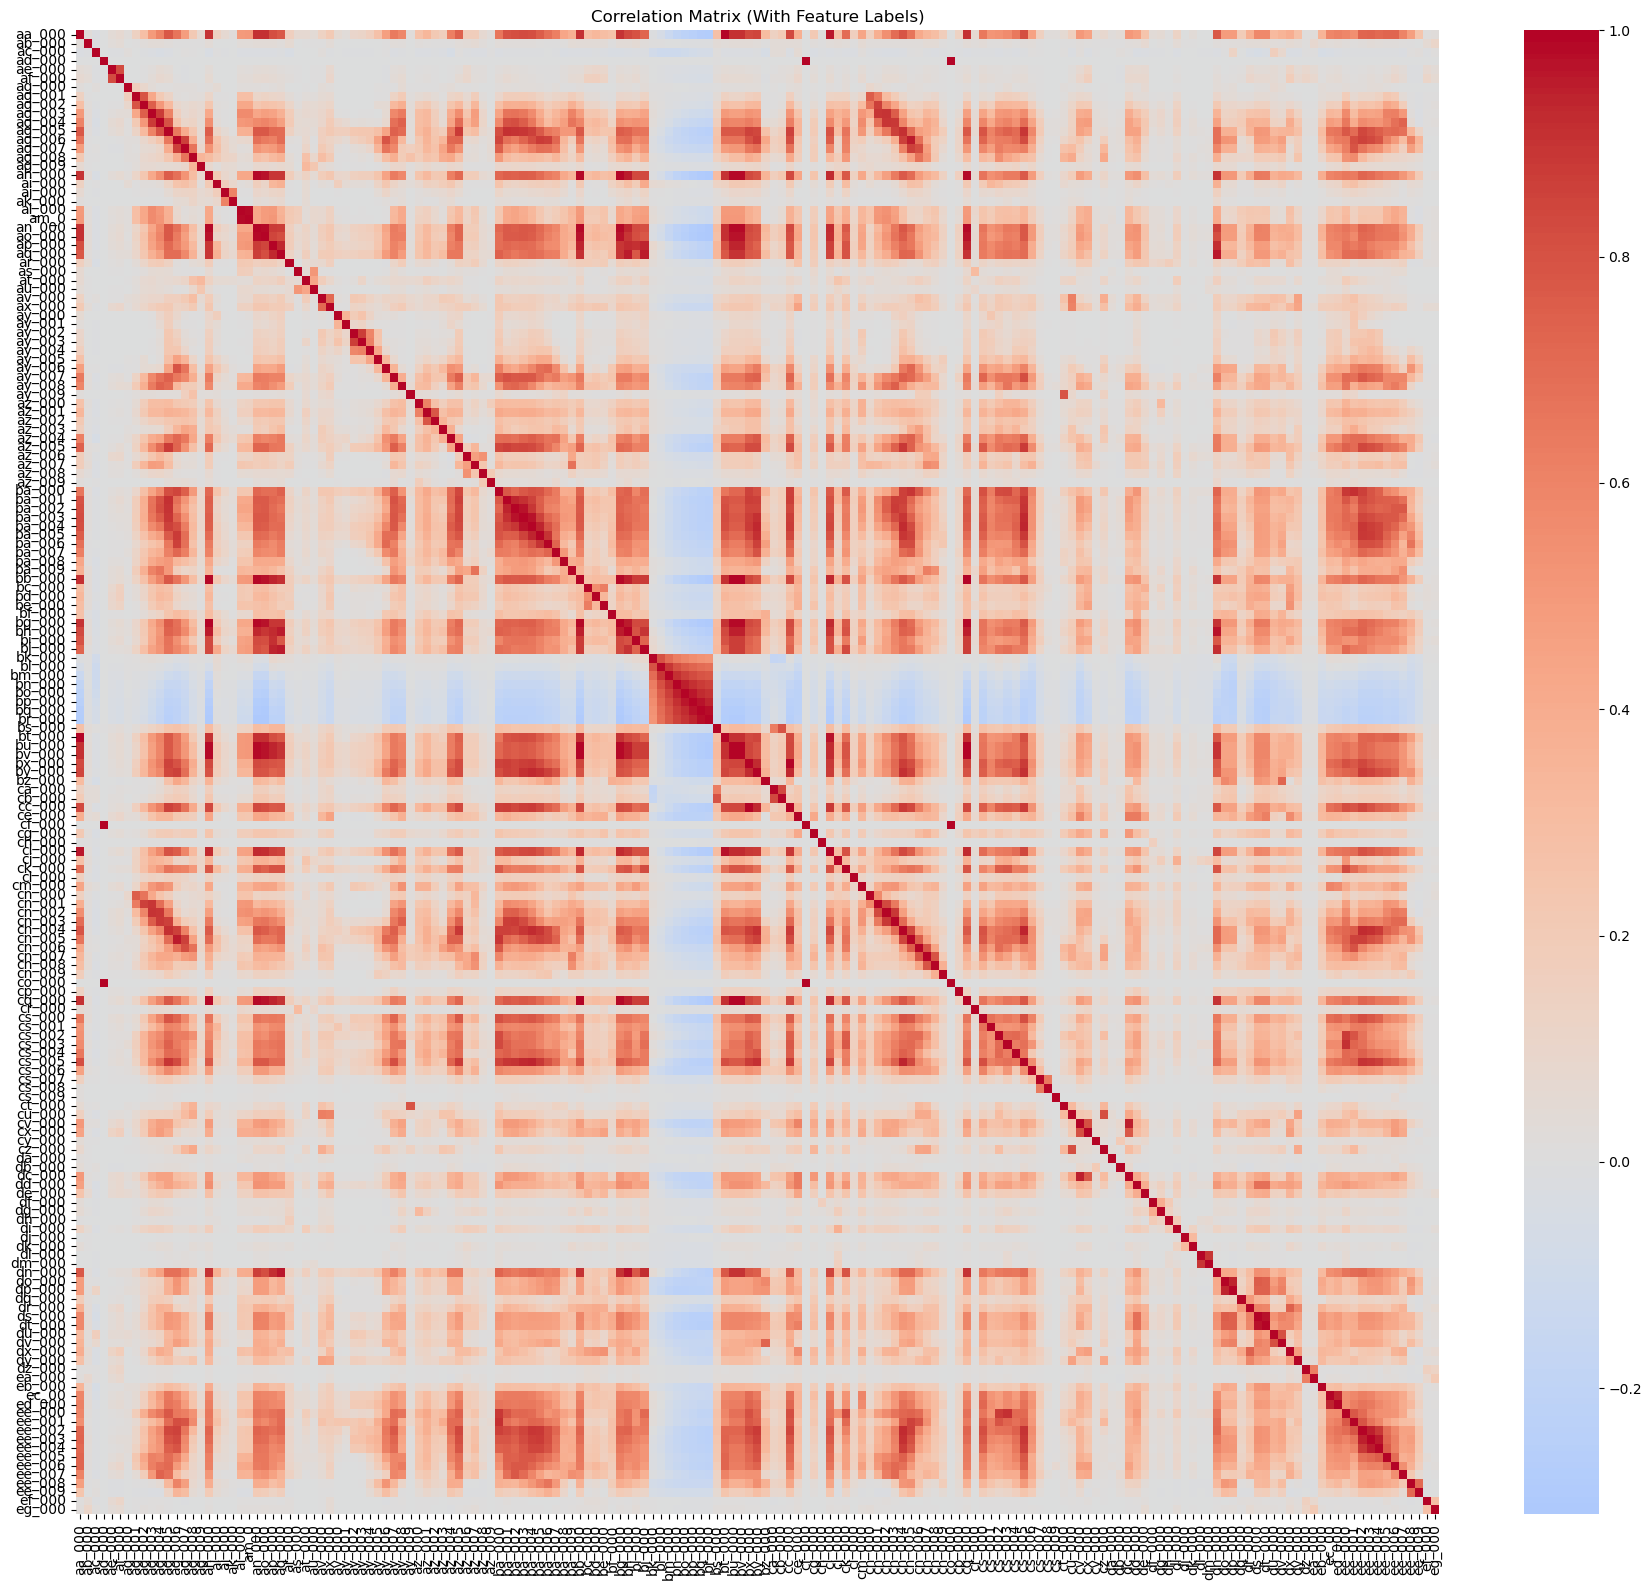

In [32]:
# dropping constant columns with zero standard deviation
dropNonConst = X_trainFilled.loc[:, X_trainFilled.std() != 0]

dtArray = dropNonConst.to_numpy()

# computing correlation matrix using numpy
corrMat = np.corrcoef(dtArray, rowvar=False)

corrMatMan = pd.DataFrame(corrMat, index=dropNonConst.columns, columns=dropNonConst.columns)

print(corrMatMan)

plt.figure(figsize=(18, 16))  # Make figure larger
sns.heatmap(corrMatMan, cmap='coolwarm', center=0,
            xticklabels=True, yticklabels=True)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.title('Correlation Matrix (With Feature Labels)')
plt.tight_layout()
plt.show()


          aa_000    ab_000    ac_000    ad_000    ae_000    af_000    ag_000  \
aa_000  1.000000  0.018828 -0.006724  0.089539  0.015277  0.017787  0.019822   
ab_000  0.018828  1.000000 -0.016177  0.042831 -0.001502  0.040105  0.000731   
ac_000 -0.006724 -0.016177  1.000000 -0.168208 -0.004065 -0.012440  0.002266   
ad_000  0.089539  0.042831 -0.168208  1.000000 -0.023999 -0.022514  0.021625   
ae_000  0.015277 -0.001502 -0.004065 -0.023999  1.000000  0.876924 -0.000833   
...          ...       ...       ...       ...       ...       ...       ...   
ee_007  0.240724  0.025320 -0.017340  0.145586  0.031275  0.026031  0.104794   
ee_008  0.140579 -0.000088  0.006265  0.130151 -0.008841 -0.011244  0.009129   
ee_009  0.067196 -0.001708  0.010266  0.061179 -0.008262 -0.009297 -0.000612   
ef_000  0.001176  0.016262 -0.006486  0.000932  0.015456  0.015408 -0.000248   
eg_000  0.000731  0.004555  0.020807 -0.005961  0.004222  0.005450 -0.000254   

          ag_001    ag_002    ag_003  .

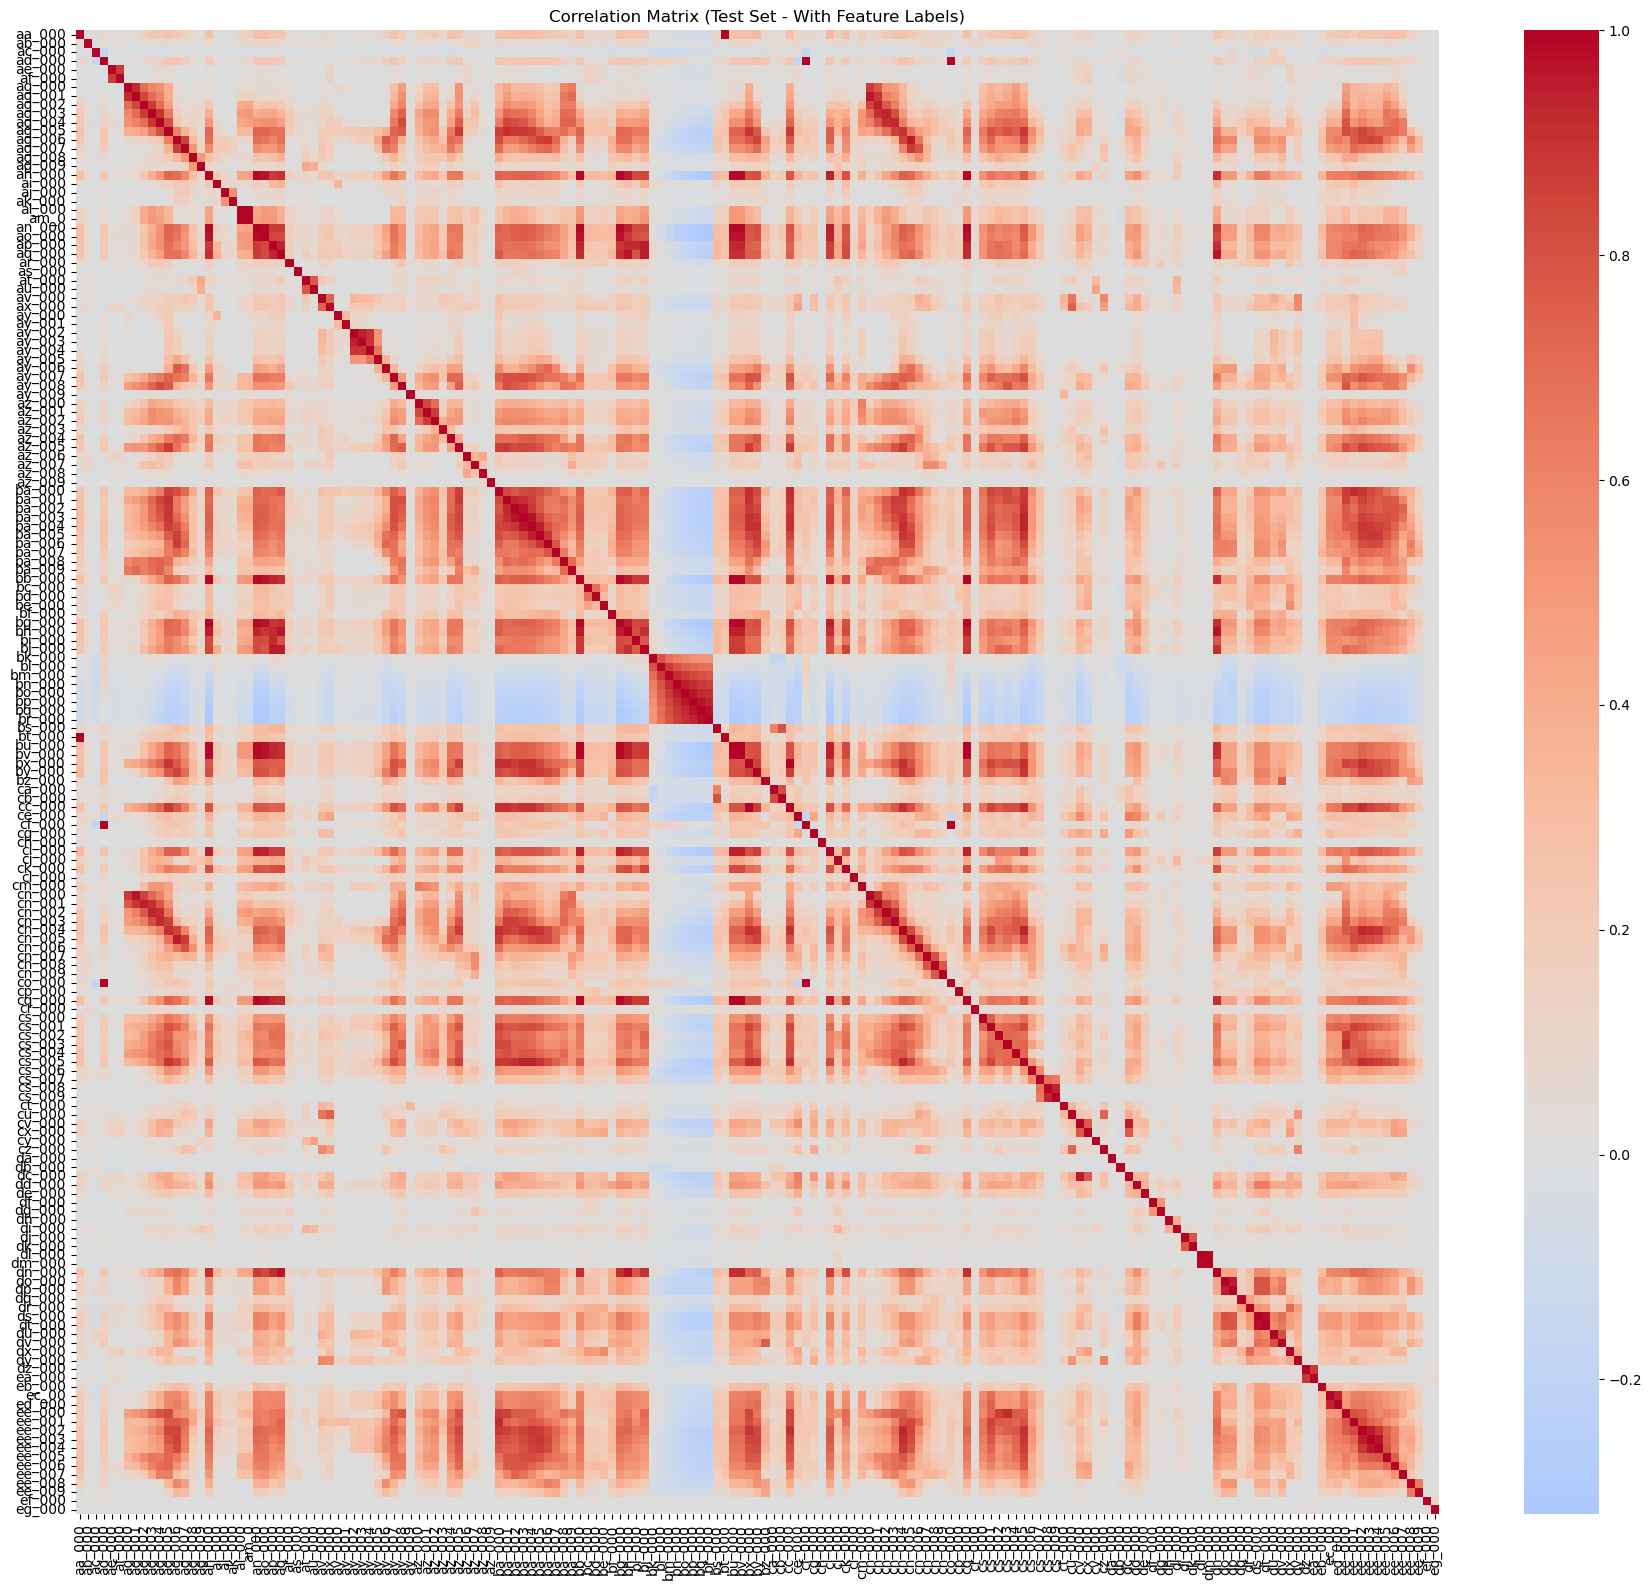

In [34]:
# dropping constant columns from the test set
dropNonConst_test = X_testFilled.loc[:, X_testFilled.std() != 0]

# converting test features to numpy array
dtArray_test = dropNonConst_test.to_numpy()

# computing correlation matrix using numpy
corrMat_test = np.corrcoef(dtArray_test, rowvar=False)

# converting numpy correlation matrix to DataFrame with feature labels
corrMatMan_test = pd.DataFrame(corrMat_test, index=dropNonConst_test.columns, columns=dropNonConst_test.columns)

# printing correlation matrix
print(corrMatMan_test)

# plotting correlation heatmap for test features
plt.figure(figsize=(18, 16))
sns.heatmap(corrMatMan_test, cmap='coolwarm', center=0,
            xticklabels=True, yticklabels=True)

plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.title('Correlation Matrix (Test Set - With Feature Labels)')
plt.tight_layout()
plt.show()



#### (iv) Make scatter plots and box plots

Selected features based on highest CV:
['cs_009', 'cf_000', 'co_000', 'ad_000', 'dh_000', 'dj_000', 'ag_000', 'as_000', 'ay_009', 'az_009', 'ak_000', 'au_000', 'ch_000']


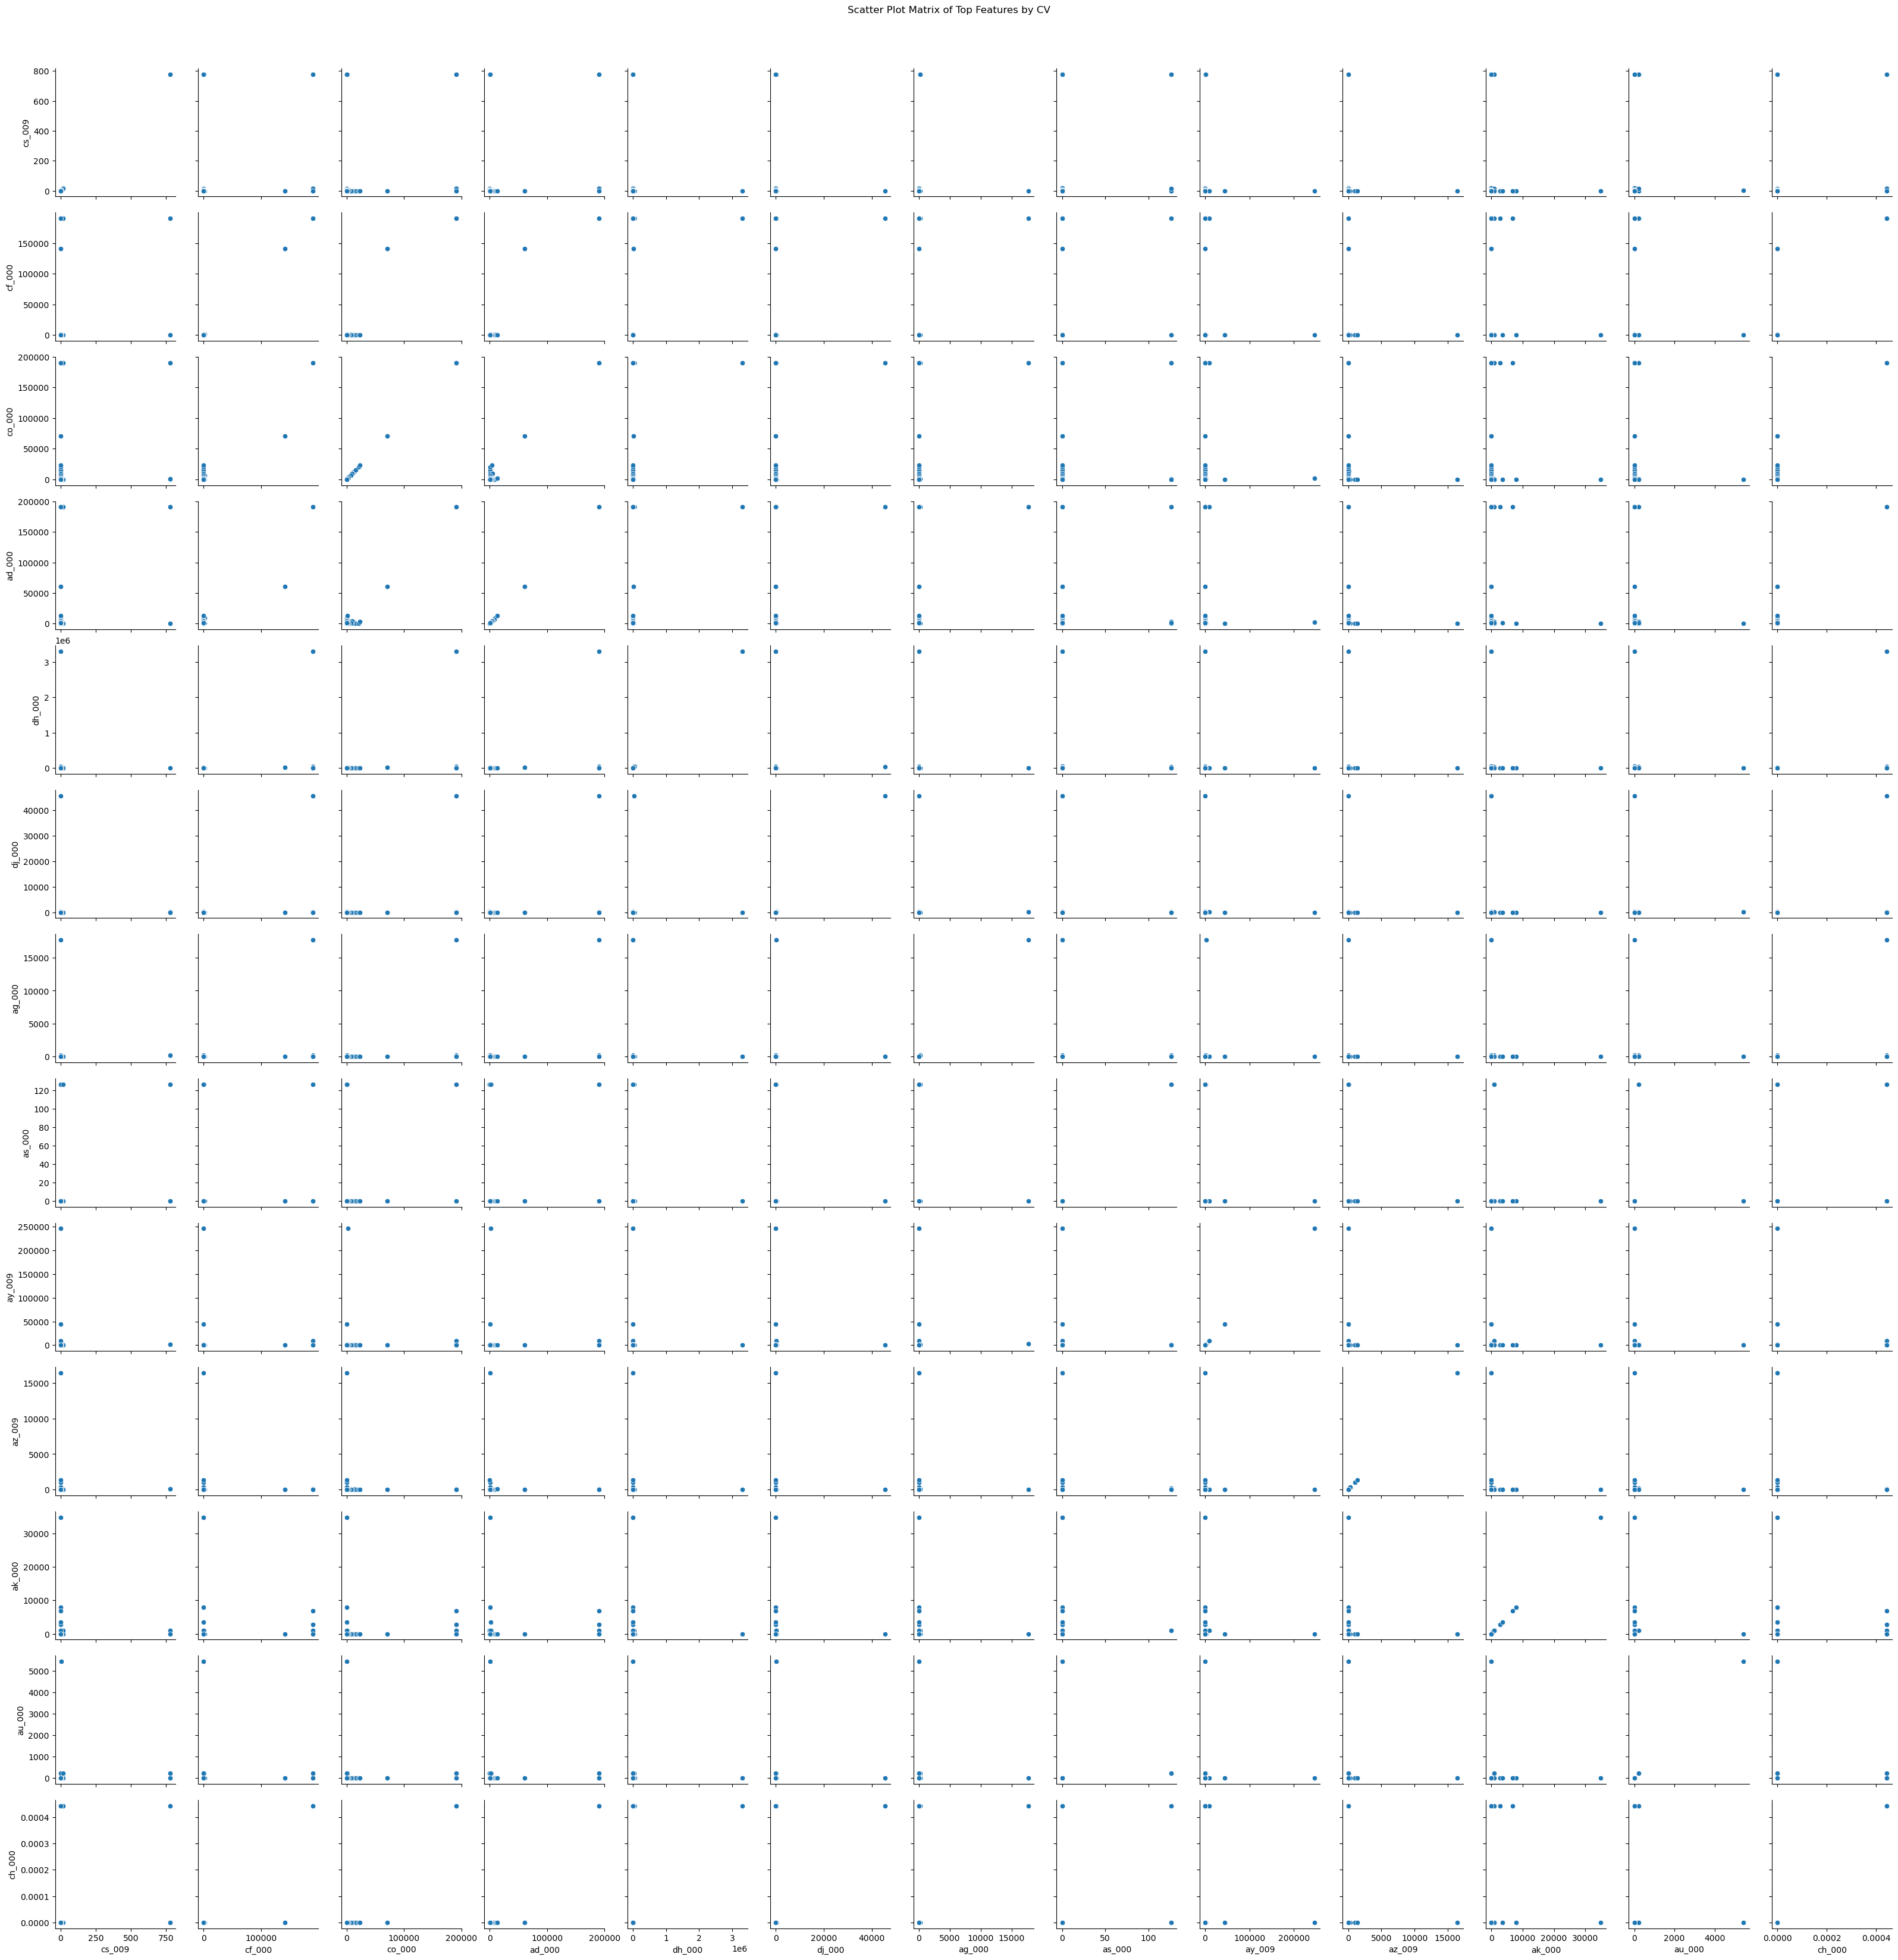

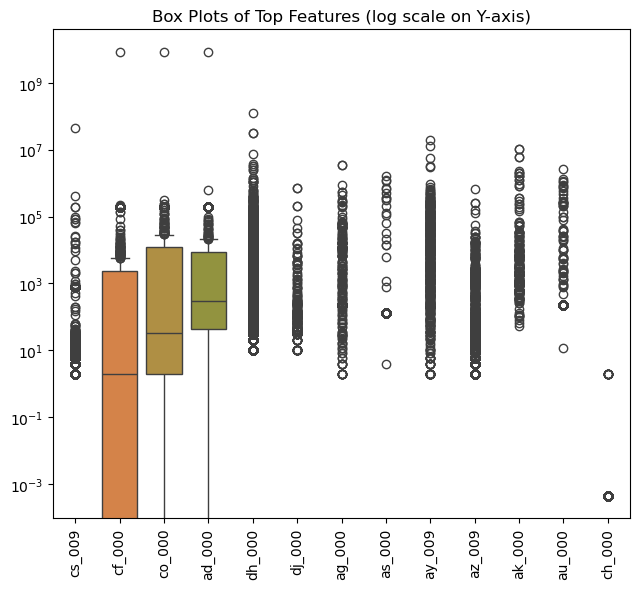

In [37]:
# calculating means of training features
means = X_trainFilled.mean()

# calculating standard deviations of training features
stds = X_trainFilled.std()

# calculating coefficient of variation for each feature
cvVal = stds / means

# creating a DataFrame for coefficient of variation
cvDs = pd.DataFrame({'cv': cvVal})

topFeat = int(math.floor(math.sqrt(X_trainFilled.shape[1])))

topCVFeat = cvDs.nlargest(topFeat, 'cv').index

topFeatDs = X_trainFilled[topCVFeat]

print("Selected features based on highest CV:")
print(topCVFeat.tolist())

sns.pairplot(X_trainFilled[topCVFeat].sample(1000), diag_kind = None)
plt.suptitle('Scatter Plot Matrix of Top Features by CV', y=1.02)
plt.show()

plt.figure(figsize=(len(topCVFeat)*0.5, 6))
box = sns.boxplot(data=topFeatDs)
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Box Plots of Top Features (log scale on Y-axis)")
plt.tight_layout()
plt.show()

Selected test set features based on highest CV:
['cs_009', 'ak_000', 'au_000', 'as_000', 'df_000', 'cs_008', 'az_009', 'eg_000', 'ch_000', 'ag_000', 'ef_000', 'dz_000', 'dh_000']


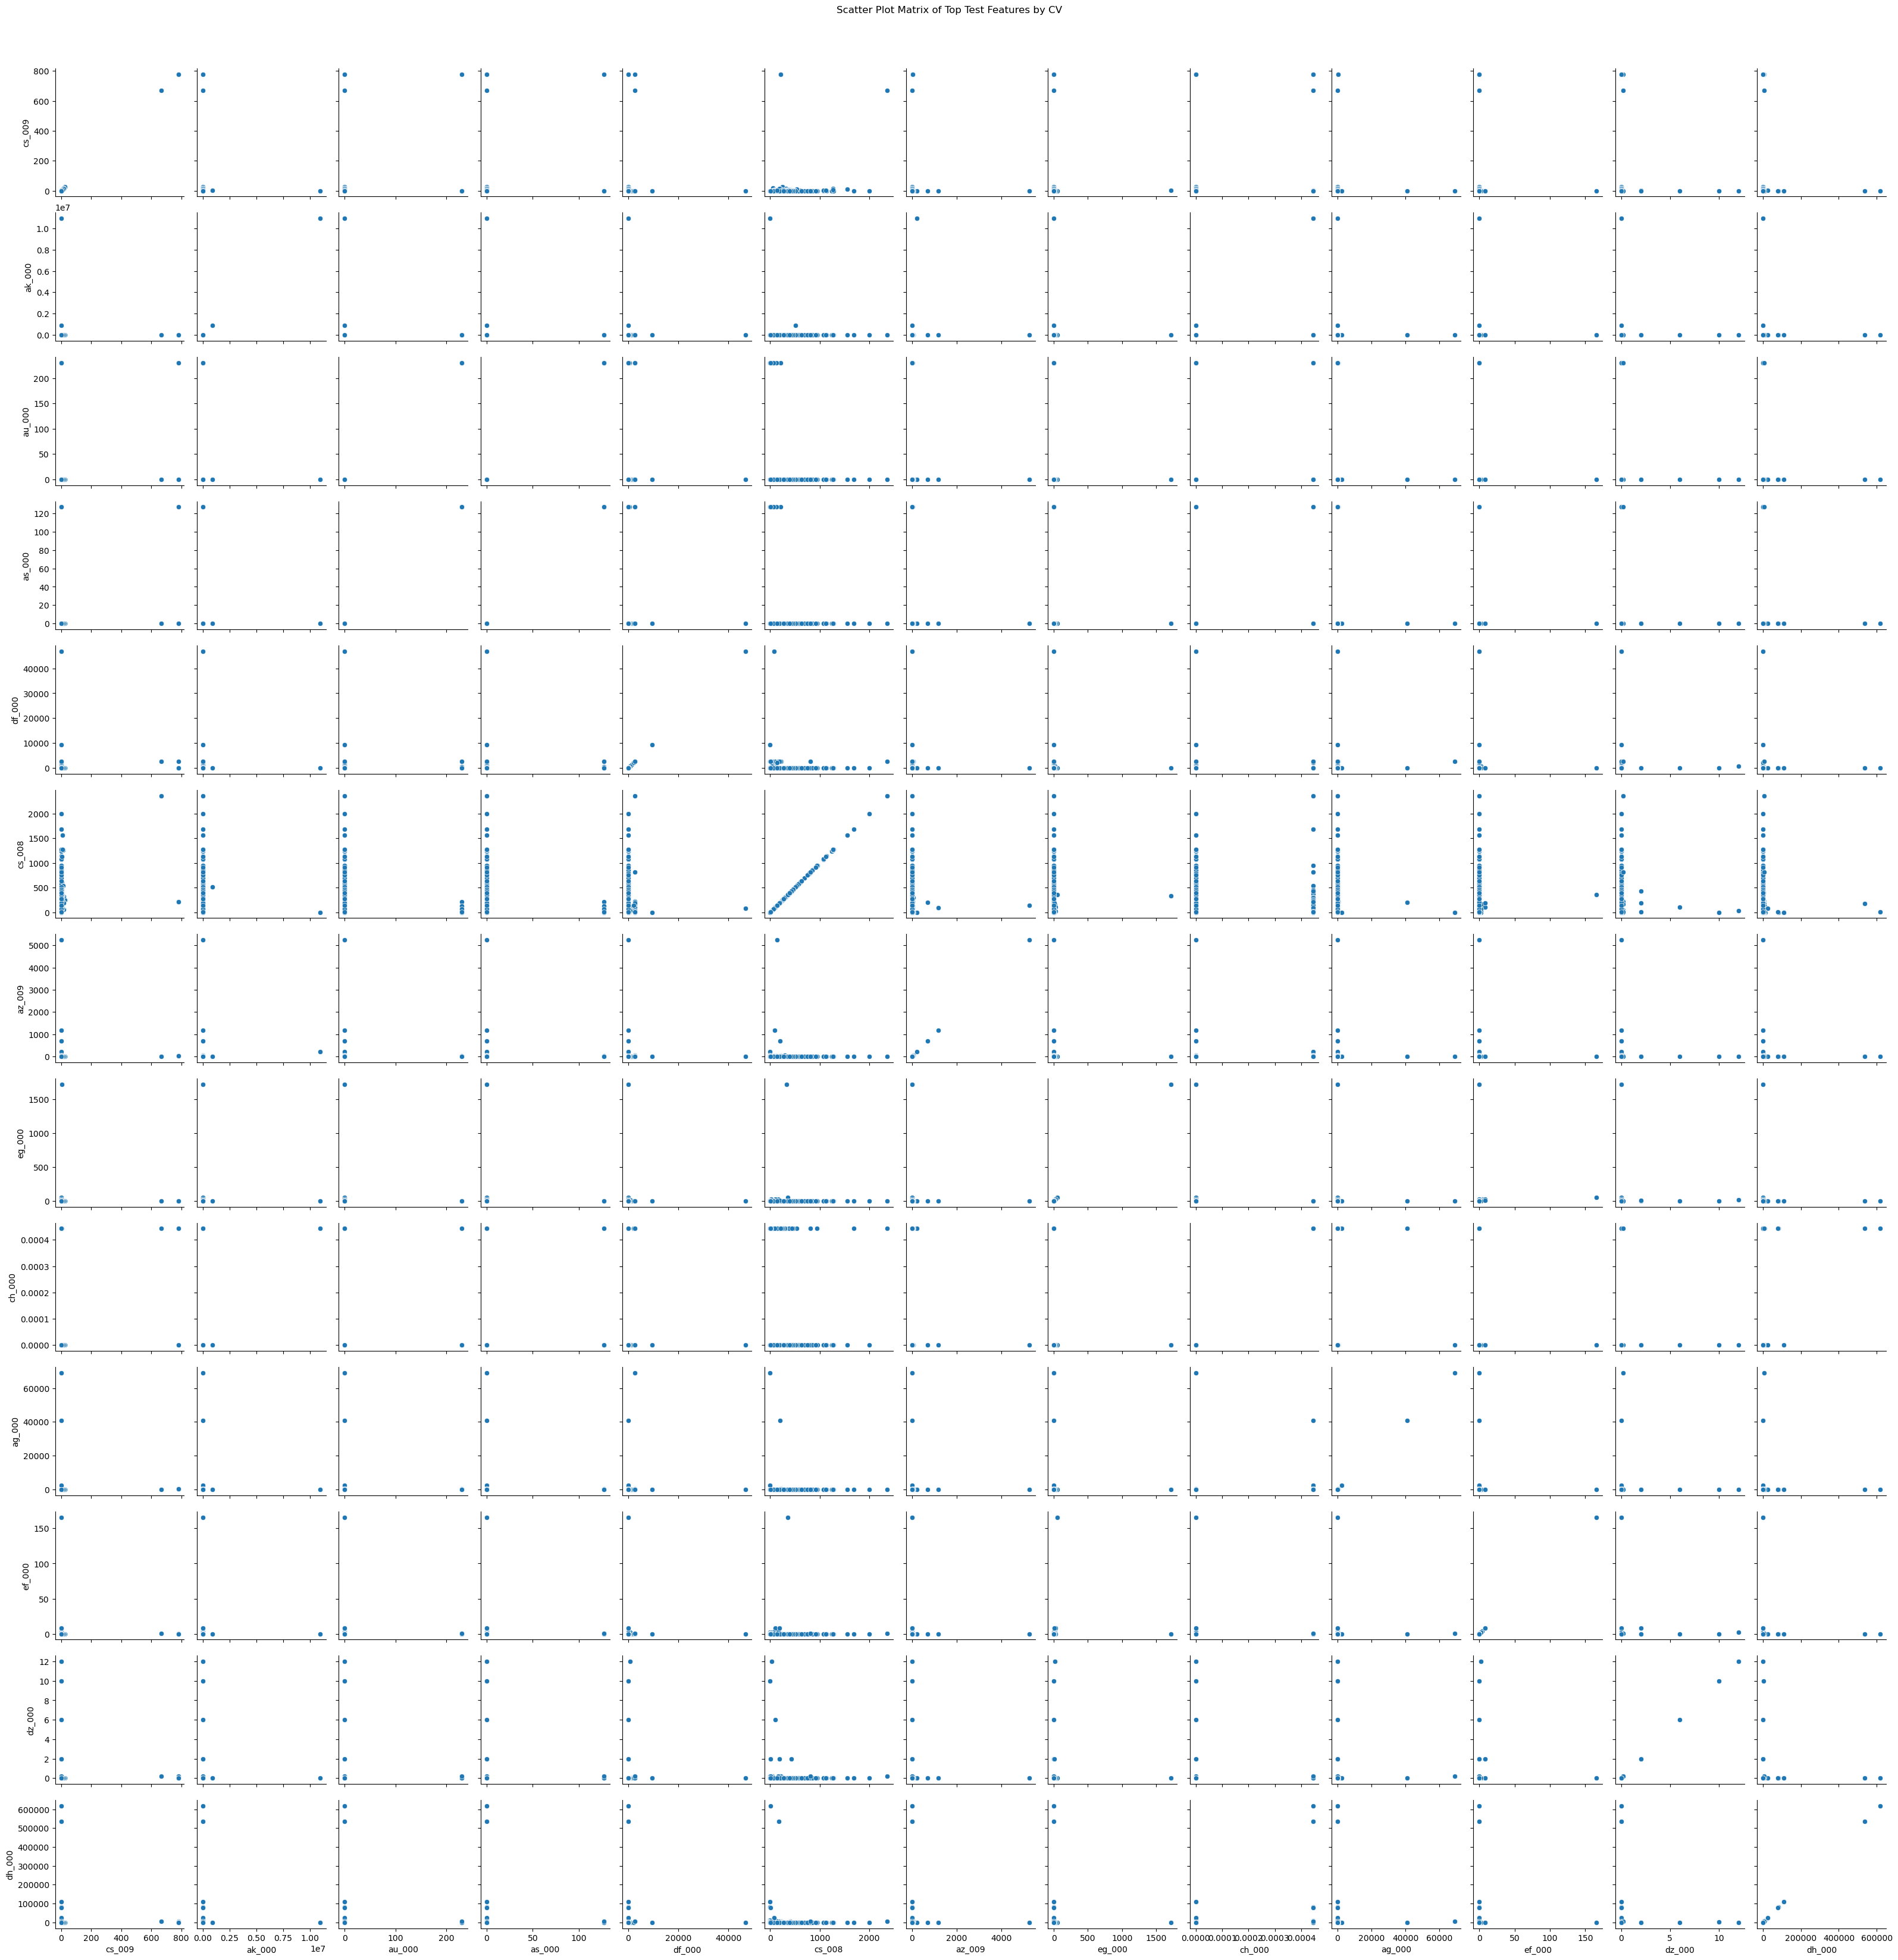

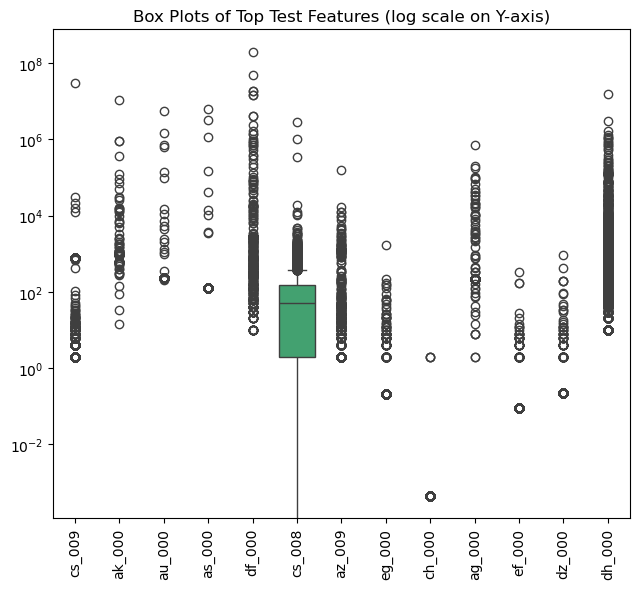

In [38]:
# calculating means of testing features
means_test = X_testFilled.mean()

# calculating standard deviations of testing features
stds_test = X_testFilled.std()

# calculating coefficient of variation for each feature
cvVal_test = stds_test / means_test

# creating a DataFrame for coefficient of variation
cvDs_test = pd.DataFrame({'cv': cvVal_test})

# selecting top ⌊√N⌋ features with highest CV from test set
topFeat_test = int(math.floor(math.sqrt(X_testFilled.shape[1])))
topCVFeat_test = cvDs_test.nlargest(topFeat_test, 'cv').index

# extracting subset of test data with top features
topFeatDs_test = X_testFilled[topCVFeat_test]

print("Selected test set features based on highest CV:")
print(topCVFeat_test.tolist())

# plotting pairplot
sns.pairplot(topFeatDs_test.sample(1000), diag_kind=None)
plt.suptitle('Scatter Plot Matrix of Top Test Features by CV', y=1.02)
plt.show()

# plotting boxplot (log scale on Y-axis)
plt.figure(figsize=(len(topCVFeat_test)*0.5, 6))
sns.boxplot(data=topFeatDs_test)
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Box Plots of Top Test Features (log scale on Y-axis)")
plt.tight_layout()
plt.show()


##### Can you draw conclusions about significance of those features, just by the scatter plots?
We can't fully rely on scatter plots alone to decide how important a feature is. The patterns we see might be misleading, especially if there are extreme values in the data. Since we filled in missing values using the mean, those outliers can shift the average and affect how the data looks, which can make it harder to tell how useful a feature really is just by looking at the plot.

#### (v) Is this data set imbalanced?

In [41]:
# counting samples in training and testing sets
totalPos = Y_train.sum() + Y_test.sum()


totalSam = len(Y_train) + len(Y_test)


totalNeg = totalSam - totalPos


print("Total positive values in training and testing sets:", int(totalPos))


print("Total negative values in training and testing sets:", int(totalNeg))

posTrain = Y_train.sum()

negTrain = len(Y_train) - posTrain

posTest = Y_test.sum()

negTest = len(Y_test) - posTest

print("Training Set:")
print("  Positive samples:", int(posTrain))
print("  Negative samples:", int(negTrain))

print("\nTesting Set:")
print("  Positive samples:", int(posTest))
print("  Negative samples:", int(negTest))

print("\nYes, this dataset is clearly imbalanced.")


Total positive values in training and testing sets: 1375
Total negative values in training and testing sets: 74625
Training Set:
  Positive samples: 1000
  Negative samples: 59000

Testing Set:
  Positive samples: 375
  Negative samples: 15625

Yes, this dataset is clearly imbalanced.


### (c) Train a random forest

Out-of-Bag Error Estimate: 0.00928

Training Set Evaluation:
Confusion Matrix:
 [[58976    24]
 [  432   568]]
Accuracy: 0.9924
Error: 0.0076
ROC AUC: 0.98624


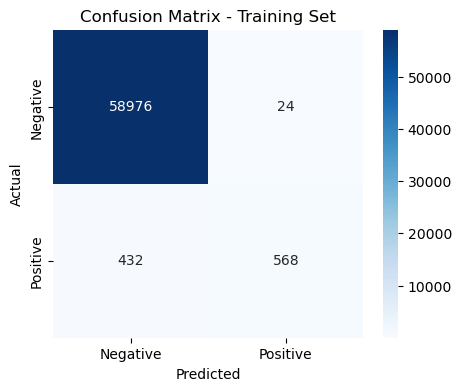

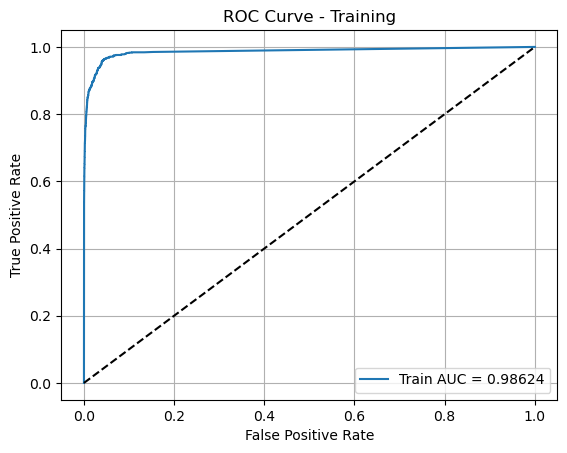

Out-of-Bag Error (Train): 0.00928


In [43]:
# print(Y_train.unique())
# print(Y_train.dtype)

# initializing the random forest classifier without class balancing
rfModel = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    oob_score=True,
    random_state=42
)


Y_train = Y_train.astype(int)


Y_test = Y_test.astype(int)

# fitting the random forest model on training data
rfModel.fit(X_trainFilled, Y_train)


oobError = 1 - rfModel.oob_score_


print(f"Out-of-Bag Error Estimate: {round(oobError, 5)}")


trainPreds = rfModel.predict(X_trainFilled)


trainProbs = rfModel.predict_proba(X_trainFilled)[:, 1]


trainConMat = confusion_matrix(Y_train, trainPreds)


trainAcc = accuracy_score(Y_train, trainPreds)


trainErr = 1 - trainAcc

trainAuc = roc_auc_score(Y_train, trainProbs)

print("\nTraining Set Evaluation:")
print("Confusion Matrix:\n", trainConMat)
print("Accuracy:", round(trainAcc, 5))
print("Error:", round(trainErr, 5))
print("ROC AUC:", round(trainAuc, 5))

# plotting confusion matrix for training set
plt.figure(figsize=(5, 4))
sns.heatmap(trainConMat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"])
plt.show()


trainFPR, trainTPR, _ = roc_curve(Y_train, trainProbs)

# plotting ROC curve for training set
plt.figure()
plt.plot(trainFPR, trainTPR, label=f"Train AUC = {trainAuc:.5f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Training")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


oobScoreTrain = rfModel.oob_score_
oobErrTrain = format(1 - oobScoreTrain, '.5f')

print(f"Out-of-Bag Error (Train): {oobErrTrain}")



Testing Set Evaluation:
Confusion Matrix:
 [[15611    14]
 [  173   202]]
Accuracy: 0.98831
Error: 0.01169
ROC AUC: 0.99414
Error on Test Set: 0.01169


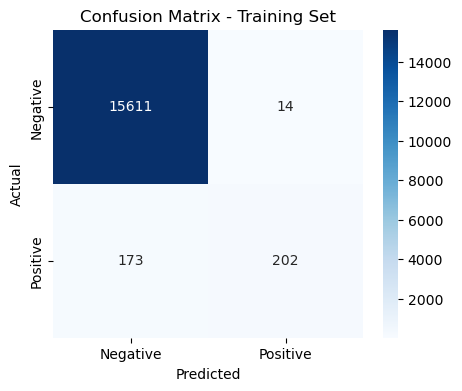

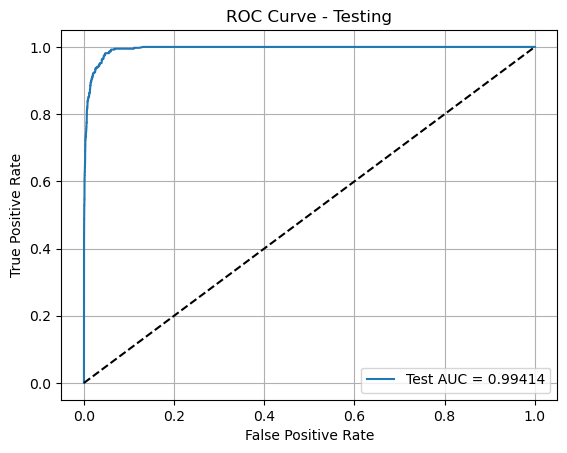

In [45]:
# predicting testing labels using the trained model
testPreds = rfModel.predict(X_testFilled)

testProbs = rfModel.predict_proba(X_testFilled)[:, 1]


testConMat = confusion_matrix(Y_test, testPreds)


testAcc = accuracy_score(Y_test, testPreds)


testErr = 1 - testAcc


testAuc = roc_auc_score(Y_test, testProbs)

# printing testing set evaluation metrics
print("\nTesting Set Evaluation:")
print("Confusion Matrix:\n", testConMat)
print("Accuracy:", round(testAcc, 5))
print("Error:", round(testErr, 5))
print("ROC AUC:", round(testAuc, 5))


testAcc = accuracy_score(Y_test, testPreds)
testErr = format(1 - testAcc, '.5f')


print(f"Error on Test Set: {testErr}")


plt.figure(figsize=(5, 4))
sns.heatmap(testConMat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"])
plt.yticks(ticks=[0.5, 1.5], labels=["Negative", "Positive"])
plt.show()


testFPR, testTPR, _ = roc_curve(Y_test, testProbs)

# plotting ROC curve for testing set
plt.figure()
plt.plot(testFPR, testTPR, label=f"Test AUC = {testAuc:.5f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Testing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


#### Calculate Out of Bag error estimate for your random forset and compare it to the test error.
The Out-of-Bag (OOB) error estimate from the Random Forest model is: 0.00928. 
The error on the test set is:0.01169. 
The OOB error is slightly lower than the test error, which is expected because OOB is still derived from training data. 
The test error is higher than the Out-of-Bag error by around 26%. This means the model makes slightly more mistakes on completely unseen data compared to its internal OOB estimate. Since the dataset is imbalanced — with far fewer positive samples than negative ones the model tends to predict the negative class more often. As a result, it misses some of the positive cases, which leads to more false negatives in the test set. This pushes the test error up compared to the OOB error, which is based on training data.

### (d) Research class imbalance in random forest

##### Random Forests can be adapted to handle imbalanced datasets in a few ways:

1) Using Class Weights:
One common method is to give more importance to the minority class by assigning it a higher weight during training. This tells the model to "pay more attention" to the less frequent class so it doesn’t get ignored. These weights are often based on how rare each class is — the rarer the class, the higher the weight.

2) Changing the Voting Strategy:
Usually, a random forest makes predictions based on a majority vote across trees. But when dealing with imbalance, we can adjust the decision threshold — instead of needing more than 50% of trees to vote for the positive class, we can shift that number lower to give the minority class a better chance of being predicted.

Out-of-Bag Error Estimate (Balanced): 0.04157

Training Set Evaluation (Balanced):
Confusion Matrix:
 [[56610  2390]
 [   31   969]]
Accuracy: 0.98997
Error: 0.04035
ROC AUC: 0.98997


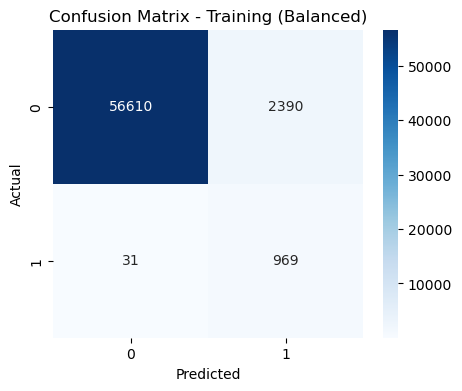

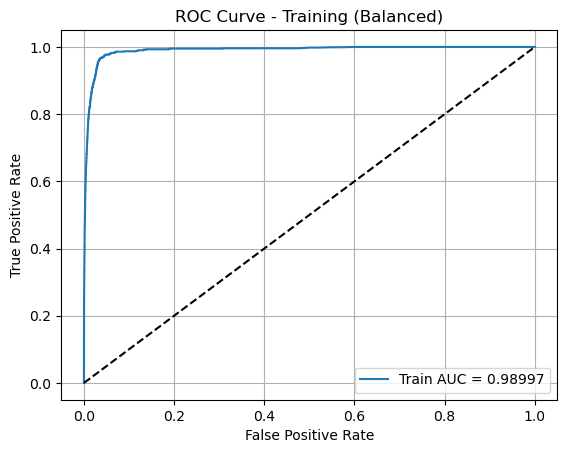

In [51]:
# initializing random forest classifier with class weight balanced
rfBalanced = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42,
    oob_score=True,
    class_weight='balanced'
)

# converting labels to integer type
Y_train = Y_train.astype(int)


Y_test = Y_test.astype(int)

# fitting the balanced model on training data
rfBalanced.fit(X_trainFilled, Y_train)

# calculating out-of-bag error for balanced model
oobErrBalanced = 1 - rfBalanced.oob_score_


print(f"Out-of-Bag Error Estimate (Balanced): {round(oobErrBalanced, 5)}")


trainPredsBal = rfBalanced.predict(X_trainFilled)


trainProbsBal = rfBalanced.predict_proba(X_trainFilled)[:, 1]


trainConfBal = confusion_matrix(Y_train, trainPredsBal)

# calculating accuracy for training predictions
trainAccBal = accuracy_score(Y_train, trainPredsBal)


trainErrBal = 1 - trainAccBal


trainAccBal = roc_auc_score(Y_train, trainProbsBal)


print("\nTraining Set Evaluation (Balanced):")
print("Confusion Matrix:\n", trainConfBal)
print("Accuracy:", round(trainAccBal, 5))
print("Error:", round(trainErrBal, 5))
print("ROC AUC:", round(trainAccBal, 5))


plt.figure(figsize=(5, 4))
sns.heatmap(trainConfBal, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Training (Balanced)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


trainBalFPR, trainBalTPR, _ = roc_curve(Y_train, trainProbsBal)

# plotting ROC curve for balanced training set
plt.figure()
plt.plot(trainBalFPR, trainBalTPR, label=f"Train AUC = {trainAccBal:.5f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Training (Balanced)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()



Testing Set Evaluation (Balanced):
Confusion Matrix:
 [[15013   612]
 [   12   363]]
Accuracy: 0.961
Error: 0.039
ROC AUC: 0.98982


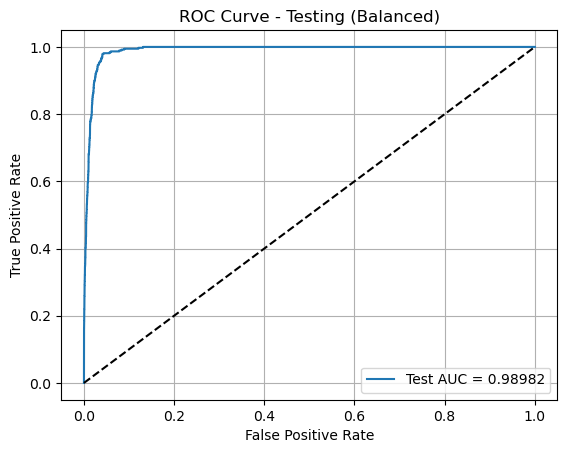

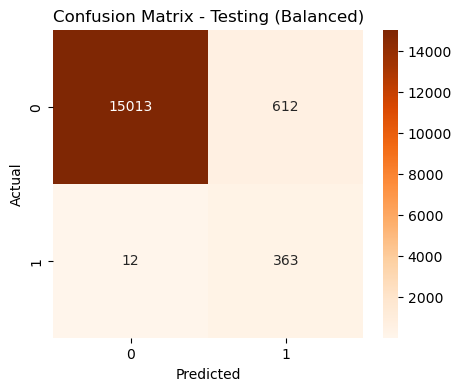

In [54]:
testPredsBal = rfBalanced.predict(X_testFilled)

testProbsBal = rfBalanced.predict_proba(X_testFilled)[:, 1]

testConBal = confusion_matrix(Y_test, testPredsBal)

testAccBal = accuracy_score(Y_test, testPredsBal)

testErrBal = 1 - testAccBal

testAucBal = roc_auc_score(Y_test, testProbsBal)

# printing evaluation metrics for balanced testing set
print("\nTesting Set Evaluation (Balanced):")
print("Confusion Matrix:\n", testConBal)
print("Accuracy:", round(testAccBal, 5))
print("Error:", round(testErrBal, 5))
print("ROC AUC:", round(testAucBal, 5))

testBalFPR, testBalTPR, _ = roc_curve(Y_test, testProbsBal)

# plotting ROC curve for balanced testing set
plt.figure()
plt.plot(testBalFPR, testBalTPR, label=f"Test AUC = {testAucBal:.5f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - Testing (Balanced)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# plotting confusion matrix heatmap for balanced testing set
plt.figure(figsize=(5, 4))
sns.heatmap(testConBal, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Testing (Balanced)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


##### Compare the results with those of 1c.
Training Set:                                                                               
Metric:   Without Balancing,	  With Balancing                                                
Accuracy:	 0.99240,	                0.95965                                                    
Error:	     0.00760,	                0.04035                                                     
ROC AUC:	     0.98624,	           0.98997                                                      
TP (pos):	   568,	                 969                                                     
FN (pos):	   432,	                  31                                                     

Testing Set:                                                                                 
Metric:	  Without Balancing,	  With Balancing                                                 
Accuracy:	 0.98831,	         0.96100                                                     
Error:	     0.01169,	         0.03900                                                     
ROC AUC:	     0.99414,	         0.98982                                                     
TP (pos):	   202,	               363                                                       
FN (pos):	   173,	                12                                                       



OOB Error:	 0.00928, 	         0.04157

##### Comparison:
When we trained the model without handling class imbalance, the test accuracy was higher (98.83%) and the test error was lower (1.17%). This happened because the model focused heavily on predicting the majority class (negatives) correctly, which made up most of the data. However, it missed many of the positive cases, leading to poor detection of the minority class.

After applying class balancing using class_weight='balanced', the test error increased to 3.9%, and accuracy dropped to 96.1%. Even though the overall accuracy went down, the model did a much better job identifying positive samples. It correctly classified more positive cases and had far fewer false negatives.

This shows a trade-off: the model becomes less accurate overall, but more fair and effective at catching rare positive events, which is often more important in imbalanced classification problems.


### (e) XGBoost and Model Trees

Best alpha (reg_alpha): 0.05
Best cross-validation accuracy: 0.99423

Training Set Evaluation:
Confusion Matrix:
 [[58991     9]
 [   74   926]]
Accuracy: 0.99862
Error: 0.00138
ROC AUC: 0.99939


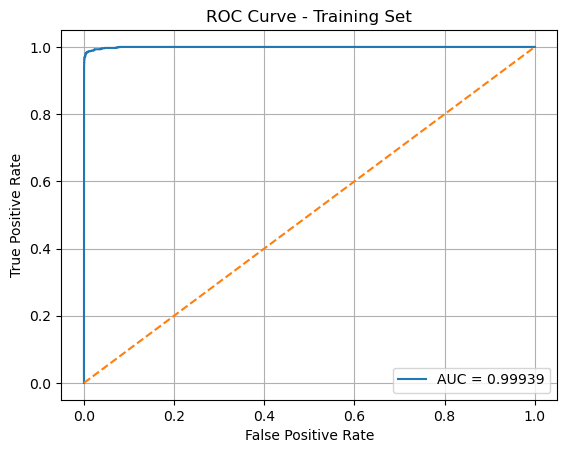


Testing Set Evaluation:
Confusion Matrix:
 [[15609    16]
 [   89   286]]
Accuracy: 0.99344
Error: 0.00656
ROC AUC: 0.99584


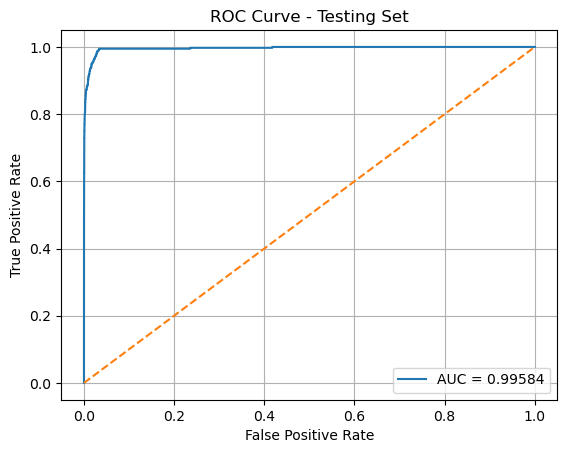

In [59]:

# scaling the training and testing data
stScaler = StandardScaler()
X_trainScal = stScaler.fit_transform(X_trainFilled)
X_testScal = stScaler.transform(X_testFilled)

# defining parameter grid for alpha regularization
param_grid = {
    'reg_alpha': [0.01, 0.05, 0.07, 0.08, 0.1, 0.2]
}

# initializing the XGBoost classifier with fixed parameters
xgbBase = XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.1,
    max_depth=5,
    colsample_bytree=0.3,
    eval_metric='logloss',
    random_state=42
)

# defining cross-validation strategy using KFold
cvStrat = KFold(n_splits=5, shuffle=True, random_state=42)

# initializing GridSearchCV to tune regularization parameter
gridSear = GridSearchCV(
    estimator=xgbBase,
    param_grid=param_grid,
    cv=cvStrat,
    scoring='accuracy',
    n_jobs=-1
)

# fitting the model using grid search
gridSear.fit(X_trainScal, Y_train)

# retrieving the best model from grid search
bestMod = gridSear.best_estimator_

# retrieving the best alpha value
bestAlph = gridSear.best_params_['reg_alpha']

# printing best alpha and cross-validation accuracy
print("Best alpha (reg_alpha):", bestAlph)
print("Best cross-validation accuracy:", round(gridSear.best_score_, 5))

# making predictions on training set
trainPreds = bestMod.predict(X_trainScal)

# generating predicted probabilities for training set
trainProbs = bestMod.predict_proba(X_trainScal)[:, 1]

# making predictions on testing set
testPreds = bestMod.predict(X_testScal)

# generating predicted probabilities for testing set
testProbs = bestMod.predict_proba(X_testScal)[:, 1]

# defining evaluation function to print metrics and plot ROC
def evaluate_model(y_true, y_pred, y_prob, title=""):
    conf = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    auc_val = roc_auc_score(y_true, y_prob)
    error = 1 - acc

    print(f"\n{title} Set Evaluation:")
    print("Confusion Matrix:\n", conf)
    print("Accuracy:", round(acc, 5))
    print("Error:", round(error, 5))
    print("ROC AUC:", round(auc_val, 5))

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc_val:.5f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.title(f"ROC Curve - {title} Set")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

    return {"conf_matrix": conf, "accuracy": acc, "error": error, "auc": auc_val}

# evaluating model on training set
trainRes = evaluate_model(Y_train, trainPreds, trainProbs, title="Training")

# evaluating model on testing set
testRes = evaluate_model(Y_test, testPreds, testProbs, title="Testing")


### (f) Use SMOTE to pre-process your data

Before SMOTE:
 class
0    59000
1     1000
Name: count, dtype: int64

After SMOTE:
 class
0    59000
1    59000
Name: count, dtype: int64
Best alpha from SMOTE data: 0.01
Cross-validation accuracy (SMOTE): 0.99411

Training (SMOTE) Set:
Confusion Matrix:
 [[58617   383]
 [   76 58924]]
Accuracy: 0.99611
Error: 0.00389
ROC AUC: 0.9999


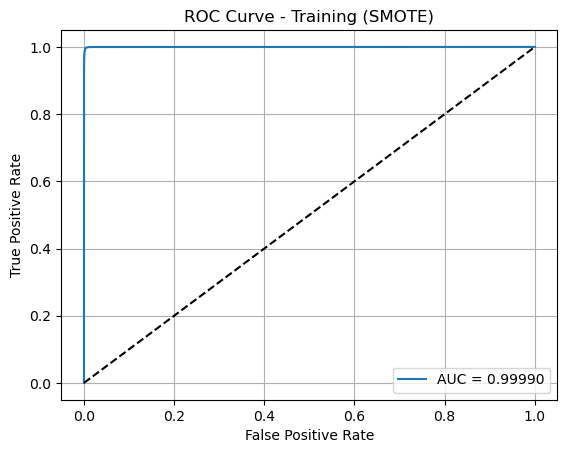


Testing (SMOTE) Set:
Confusion Matrix:
 [[15488   137]
 [   46   329]]
Accuracy: 0.98856
Error: 0.01144
ROC AUC: 0.99493


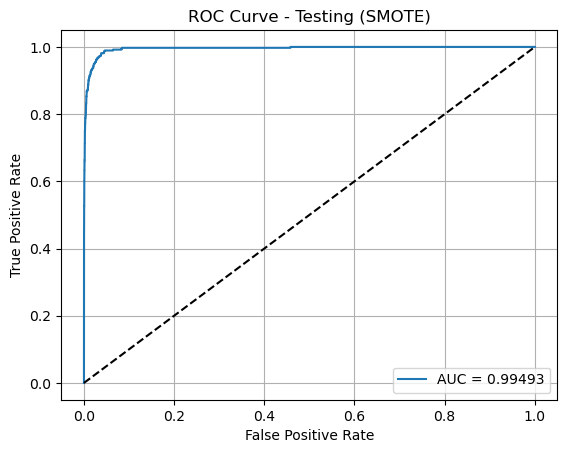


Comparison Table:


,Train Accuracy,Train Error,Train ROC,Test Accuracy,Test Error,Test ROC
Without SMOTE,0.998617,0.001383,0.999388,0.993437,0.006563,0.995836
With SMOTE,0.996110,0.003890,0.999904,0.988563,0.011437,0.994933


In [61]:


# scaling training and testing data
stScaler = StandardScaler()
X_trainScal = stScaler.fit_transform(X_trainFilled)
X_testScal = stScaler.transform(X_testFilled)

# applying SMOTE to the scaled training data
sm = SMOTE(random_state=42)
X_trainSmote, Y_trainSmote = sm.fit_resample(X_trainScal, Y_train)


print("Before SMOTE:\n", pd.Series(Y_train).value_counts())
print("\nAfter SMOTE:\n", pd.Series(Y_trainSmote).value_counts())


param_grid = {'reg_alpha': [0.01, 0.05, 0.07, 0.08, 0.1, 0.2]}

# initializing XGBoost classifier
xgbMod = XGBClassifier(
    objective='binary:logistic',
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=5,
    eval_metric='logloss',
    random_state=42
)

# setting up 5-fold cross-validation
cvStrat = KFold(n_splits=5, shuffle=True, random_state=42)

# performing grid search for best alpha
grid = GridSearchCV(xgbMod, param_grid, cv=cvStrat, scoring='accuracy', n_jobs=-1)
grid.fit(X_trainSmote, Y_trainSmote)

# retrieving best alpha from grid search
bestAlph = grid.best_params_['reg_alpha']


print("Best alpha from SMOTE data:", bestAlph)
print("Cross-validation accuracy (SMOTE):", round(grid.best_score_, 5))

# retrieving best model from grid search
finalModel = grid.best_estimator_


trainPredsSmote = finalModel.predict(X_trainSmote)
trainProbsSmote = finalModel.predict_proba(X_trainSmote)[:, 1]


testPredsSmote = finalModel.predict(X_testScal)
testProbsSmote = finalModel.predict_proba(X_testScal)[:, 1]

# defining evaluation function for model performance
def evaluate(y_true, y_pred, y_prob, label=""):
    acc = accuracy_score(y_true, y_pred)
    err = 1 - acc
    auc = roc_auc_score(y_true, y_prob)
    conf = confusion_matrix(y_true, y_pred)
    
    print(f"\n{label} Set:")
    print("Confusion Matrix:\n", conf)
    print("Accuracy:", round(acc, 5))
    print("Error:", round(err, 5))
    print("ROC AUC:", round(auc, 5))

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc:.5f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve - {label}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

    return {"accuracy": acc, "error": err, "auc": auc}

# evaluating SMOTE model on training set
trainResultSmote = evaluate(Y_trainSmote, trainPredsSmote, trainProbsSmote, "Training (SMOTE)")

# evaluating SMOTE model on testing set
testResultSmote = evaluate(Y_test, testPredsSmote, testProbsSmote, "Testing (SMOTE)")

# creating comparison DataFrame with and without SMOTE
compare_df = pd.DataFrame({
    "Train Accuracy": [trainRes['accuracy'], trainResultSmote['accuracy']],
    "Train Error": [trainRes['error'], trainResultSmote['error']],
    "Train ROC": [trainRes['auc'], trainResultSmote['auc']],
    "Test Accuracy": [testRes['accuracy'], testResultSmote['accuracy']],
    "Test Error": [testRes['error'], testResultSmote['error']],
    "Test ROC": [testRes['auc'], testResultSmote['auc']]
}, index=["Without SMOTE", "With SMOTE"])

# displaying the comparison table
print("\nComparison Table:")
display(compare_df)


## 2. ISLR 6.6.3

(a) Training RSS as s increases from 0

Steadily decrease.
When the value of s is close to 0, the model is highly limited—most of the coefficients (β values) are kept near zero, so the model mainly predicts the average outcome using just the intercept. This leads to a high training RSS because the model isn’t able to fit the data well. As s increases, these restrictions are relaxed, allowing the coefficients to adjust and better fit the data. This causes the training RSS to steadily decrease, eventually approaching the minimum RSS achieved by ordinary least squares regression when there are no coefficient constraints.

(b) Test RSS as s increases from 0
Decrease initially, and then eventually start increasing in a U shape.
As the value of s increases from zero, the model becomes more flexible and starts fitting the data better, which causes the test RSS to decrease. However, after a certain point, if s continues to grow, the model becomes too complex and starts overfitting the training data. This leads to worse performance on unseen data, causing the test RSS to increase again. This results in a U-shaped curve when plotting test RSS against s.

c) Variance as s increases from 0

Steadily increase.
When \( s = 0 \), the model is highly restricted and basically acts like a constant predictor, so there’s no variation in its output. As \( s \) increases, the model is allowed to include more coefficients (betas), which gives it more flexibility to fit the training data. This flexibility means the model starts reacting more to the specific patterns in the training set, which leads to greater variation in its predictions. So, as \( s \) grows, the model’s variance increases because it becomes more sensitive to the training data.

(d) Squared Bias as s increases from 0

Steadily decrease
As the value of s increases, the model becomes more flexible and starts using more features to make predictions. This allows it to better capture patterns in the training data, which reduces the gap between the model’s predictions and the actual values. In other words, the bias decreases because the model is no longer making overly simplistic assumptions like it does when s = 0, where it predicts just a constant. This reflects the natural behavior in the bias-variance trade-off — as the model fits the data better, bias goes down.


(e) Irreducible Error as s increases from 0

Remain constant.
Irreducible error is "act of god" and not in any ML model's control to change. Hence it will remain constant.

## 3. ISLR 6.6.5

## ISLR 6.6.5

### Given Conditions

$$
n = 2, \quad p = 2, \quad x_{11} = x_{12} \quad \text{and} \quad x_{21} = x_{22}
$$

$$
y_1 + y_2 = 0, \quad x_{11} + x_{21} = 0, \quad x_{12} + x_{22} = 0
$$

**Thus**,  
$$
\hat{\beta}_0 = 0
$$


---

### (a) Ridge regression optimization problem is:

$$
\min_{\beta_1, \beta_2} \sum_{i=1}^{n} \left( y_i - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$

$$
= \min_{\beta_1, \beta_2} \left( y_1 - \beta_1 x_{11} - \beta_2 x_{12} \right)^2 + \left( y_2 - \beta_1 x_{21} - \beta_2 x_{22} \right)^2 + \lambda \left( \beta_1^2 + \beta_2^2 \right)
$$

$$
= \boxed{\min_{\beta_1, \beta_2} \left( y_1 - (\beta_1 + \beta_2)x_{11} \right)^2 + \left( y_2 - (\beta_1 + \beta_2)x_{21} \right)^2 + \lambda (\beta_1^2 + \beta_2^2)}
$$

---

### (b)

We know that 
$$
x_{11} = x_{12} 
$$
and 
$$
x_{21} = x_{22}
$$
and let 
$$
x_{11} = x_{12} = x_1  
$$
and 
$$
x_{21} = x_{22} = x_2 
$$


**Optimization problem is:**

$$
O = \min_{\beta_1, \beta_2} \left( y_1 - \beta_1 x_1 - \beta_2 x_1 \right)^2 + \left( y_2 - \beta_1 x_2 - \beta_2 x_2 \right)^2 + \lambda (\beta_1^2 + \beta_2^2)
$$

To obtain $ \beta_1 $ and $ \beta_2 $, let us do:


$$
\frac{\partial O}{\partial \beta_1} = 0 \quad \text{and} \quad \frac{\partial O}{\partial \beta_2} = 0
$$

$$
\frac{\partial O}{\partial \beta_1} = 2 \left( y_1 - \beta_1 x_1 - \beta_2 x_1 \right)(-x_1) + 2 \left( y_2 - \beta_1 x_2 - \beta_2 x_2 \right)(-x_2) + 2\lambda \beta_1
$$


$$
\Rightarrow -2y_1 x_1 + 2\beta_1 x_1^2 + 2\beta_2 x_1^2 - 2y_2 x_2 + 2\beta_1 x_2^2 + 2\beta_2 x_2^2 + 2\lambda \beta_1 = 0 \quad \text{--- (1)}
$$

$$
\frac{\partial O}{\partial \beta_2} = 2(y_1 - \beta_1 x_1 - \beta_2 x_2)(-x_1) + 2(y_2 - \beta_2 x_2 - \beta_2 x_2)(-x_2) + 2\lambda \beta_2
$$

$$
\Rightarrow -2y_1 x_1 + 2\beta_1 x_1^2 + 2\beta_2 x_1^2 - 2y_2 x_2 + 2\beta_1 x_2^2 + 2\beta_2 x_2^2 + 2\lambda \beta_2 = 0 \quad \text{--- (2)}
$$

Since minimum occurs at  
$$
\frac{\partial O}{\partial \beta_1} = \frac{\partial O}{\partial \beta_2} = 0
$$

Equating (1) and (2):  
We have  
$$
2\lambda \beta_1 = 2\lambda \beta_2 \Rightarrow \boxed{\beta_1 = \beta_2}
$$

One solution where the coefficients are equal.

---

### (c) Lasso optimization problem is:

$$
\min_{\beta_1, \beta_2} \sum_{i=1}^{n} \left( y_i - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$

$$
= \min_{\beta_1, \beta_2} \left( y_1 - \beta_1 x_{11} - \beta_2 x_{12} \right)^2 + \left( y_2 - \beta_1 x_{21} - \beta_2 x_{22} \right)^2 + \lambda (|\beta_1| + |\beta_2|)
$$

wkt
$$
x_{11} = x_{12} = x_1 \quad \text{and} \quad x_{21} = x_{22} = x_2
$$

Then:

$$
\boxed{\min_{\beta_1, \beta_2} \left( y_1 - (\beta_1 + \beta_2) x_1 \right)^2 + \left( y_2 - (\beta_1 + \beta_2) x_2 \right)^2 + \lambda (|\beta_1| + |\beta_2|)}
$$

---

### (d)

In **Lasso optimization**, there is a constraint on the sum of absolute values of $ \beta_1 $ and $ \beta_2 $  
but no other constraint that builds a relation between them.

If total budget is $C$ we can have $\beta_1 = a $, $ \beta_2 = b $ where $|a| + |b| = C $ is satisfied.

Let our optimization problem be:

$$
\min_{\beta_1, \beta_2} \left( y_1 - \beta_1 x_1 - \beta_2 x_1 \right)^2 + \left( y_2 - \beta_1 x_2 - \beta_2 x_2 \right)^2 + \lambda \left( |\beta_1| + |\beta_2| \right)
$$

Minimum is found at:

$$
\frac{\partial O}{\partial \beta_1} = 0 \quad \text{and} \quad \frac{\partial O}{\partial \beta_2} = 0
$$

Partial derivatives:

$$
\frac{\partial O}{\partial \beta_1} = -2y_1 x_1 + 2\beta_1 x_1^2 + 2\beta_2 x_1^2 - 2y_2 x_2 + 2\beta_1 x_2^2 + 2\beta_2 x_2^2 \pm \lambda
$$

$$
\frac{\partial O}{\partial \beta_2} = -2y_1 x_1 + 2\beta_1 x_1^2 + 2\beta_2 x_1^2 - 2y_2 x_2 + 2\beta_1 x_1^2 + 2\beta_2 x_2^2 \pm \lambda
$$

Since

$$
\frac{\partial O}{\partial \beta_1} = \frac{\partial O}{\partial \beta_2} = 0
$$

These equations have solution at:

$$
|\beta_1| = 0
$$



## 4. ISLR 8.4.5

1) Majority Vote Approach : In this approach, we classify each bootstrap sample prediction as "Red" if the probability 𝑃(Class is Red ∣ 𝑋) is greater than 0.5. Probabilities greater than 0.5 in the given list are: 0.55, 0.6, 0.6, 0.65, 0.7 and 0.75. Out of the 10 samples, 6 predictions classify the class as "Red" , while the remaining 4 classify it as "Green". Hence final classification by Majority Vote will be Red.
2) Average Probability Approach: In this approach, we calculate the average of all the given probabilities and classify as "Red" if the average is greater than 0.5.
Average probability calculation:
(0.1 + 0.15 + 0.2 + 0.2 + 0.55 + 0.6 + 0.6 + 0.65 + 0.7 + 0.75)/10 = 4.5/10 = 0.45
Since the average probability=0.45 is less than 0.5, we classify it as "Green".

## 5. ISLR 9.7.3

#### a)  We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label. Sketch the observations.

In [69]:
x1 = [3,2,4,1,2,4,4]
x2 = [4,2,4,4,1,3,1]
y = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']
dataISLR = pd.DataFrame(list(zip(x1,x2,y)), columns = ['X1','X2','y'])
dataISLR

,X1,X2,y
0,3,4,Red
1,2,2,Red
2,4,4,Red
3,1,4,Red
4,2,1,Blue
5,4,3,Blue
6,4,1,Blue


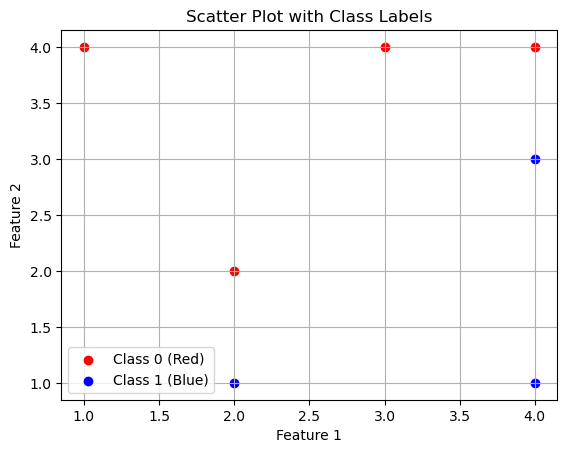

In [70]:

points = np.array([[3, 4], [2, 2], [4, 4], [1, 4], [2, 1], [4, 3], [4, 1]])
labels = np.array([0, 0, 0, 0, 1, 1, 1])  # 0 = Red, 1 = Blue

for classVal, color, labelTxt in zip([0, 1], ['red', 'blue'], ['Class 0 (Red)', 'Class 1 (Blue)']):
    subset = points[labels == classVal]
    plt.scatter(subset[:, 0], subset[:, 1], color=color, label=labelTxt)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot with Class Labels')
plt.legend()
plt.grid(True)
plt.show()


#### b) Sketch the optimal separating hyperplane, and provide the equa- tion for this hyperplane (of the form (9.1)).

The optimal separating hyperplane lies between the closest points of the two classes. In this case, we consider points (2, 1) and (4, 3) from one class, and (2, 2) and (4, 4) from the other class. The midpoint between these pairs lies approximately along the line passing through (2, 1.5) and (4, 3.5).

To find the equation of this line, we calculate the slope:

$$
\text{slope} = \frac{3.5 - 1.5}{4 - 2} = \frac{2}{2} = 1
$$

Using the slope-intercept form:

$$
y = x + b
$$

We substitute the point \( (2, 1.5) \) to solve for \( b \):

$$
1.5 = 2 + b
$$
$$
b = 1.5 - 2 = -0.5
$$

So, the equation of the hyperplane is:

$$
y = x - 0.5
$$


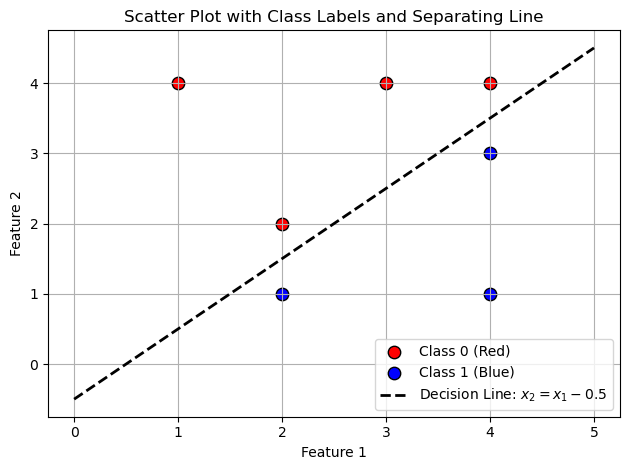

In [73]:


points = np.array([[3, 4], [2, 2], [4, 4], [1, 4], [2, 1], [4, 3], [4, 1]])
labels = np.array([0, 0, 0, 0, 1, 1, 1])  # 0 = Red, 1 = Blue

for classVal, color, labelTxt in zip([0, 1], ['red', 'blue'], ['Class 0 (Red)', 'Class 1 (Blue)']):
    subset = points[labels == classVal]
    plt.scatter(subset[:, 0], subset[:, 1], color=color, label=labelTxt, edgecolor='black', s=80)

# adding separating line: x2 = x1 - 0.5
x_vals = np.linspace(np.min(points[:, 0]) - 1, np.max(points[:, 0]) + 1, 100)
y_vals = x_vals - 0.5
plt.plot(x_vals, y_vals, linestyle='--', color='black', linewidth=2, label='Decision Line: $x_2 = x_1 - 0.5$')


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot with Class Labels and Separating Line')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.

We can write the classifier as $f(x) = 0.5 - X_1 + X_2$
.A point is classified to Red if$f(x)>0$
, Blue otherwise.

#### d) On your sketch, indicate the margin for the maximal margin hyperplane.

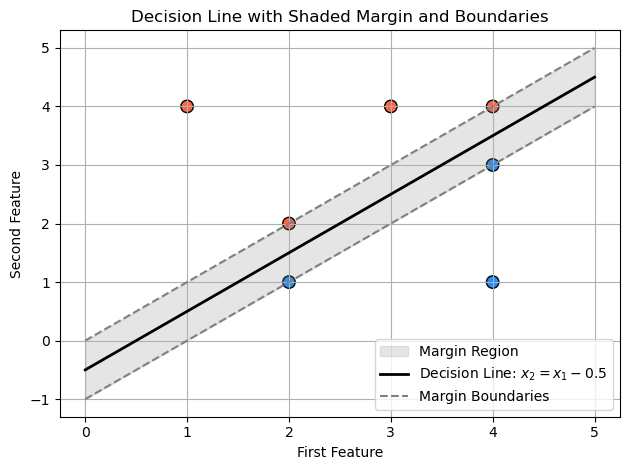

In [99]:
points = np.array([[3, 4], [2, 2], [4, 4], [1, 4], [2, 1], [4, 3], [4, 1]])
labels = np.array([0, 0, 0, 0, 1, 1, 1])  # 0 = red, 1 = blue

cusCmap = ListedColormap(['tomato', 'dodgerblue'])

x_vals = np.linspace(np.min(points[:, 0]) - 1, np.max(points[:, 0]) + 1, 200)

decLine = x_vals - 0.5
marginSize = 0.5
upLine = decLine + marginSize
lowLine = decLine - marginSize

plt.scatter(points[:, 0], points[:, 1], c=labels, cmap=cusCmap, edgecolor='black', s=80)

plt.fill_between(x_vals, lowLine, upLine, color='gray', alpha=0.2, label='Margin Region')

plt.plot(x_vals, decLine, color='black', linewidth=2, label='Decision Line: $x_2 = x_1 - 0.5$')

plt.plot(x_vals, upLine, color='gray', linestyle='--', linewidth=1.5, label='Margin Boundaries')
plt.plot(x_vals, lowLine, color='gray', linestyle='--', linewidth=1.5)

plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.title('Decision Line with Shaded Margin and Boundaries')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### e) Indicate the support vectors for the maximal margin classifier

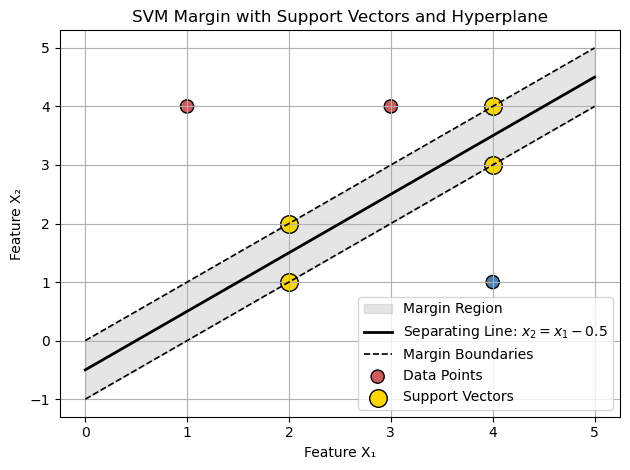

In [79]:




dataPoint = np.array([[3, 4], [2, 2], [4, 4], [1, 4], [2, 1], [4, 3], [4, 1]])
classLabel = np.array([0, 0, 0, 0, 1, 1, 1])  # 0 = Class A, 1 = Class B

supVec = np.array([[2, 2], [4, 4], [2, 1], [4, 3]])

x_vals = np.linspace(np.min(dataPoint[:, 0]) - 1, np.max(dataPoint[:, 0]) + 1, 200)

decLine = x_vals - 0.5
margined = 0.5
upMargin = decLine + margined
lowMargin = decLine - margined

colorPal = ListedColormap(['indianred', 'steelblue'])

plt.fill_between(x_vals, lowMargin, upMargin, color='gray', alpha=0.2, label='Margin Region')

plt.plot(x_vals, decLine, color='black', linewidth=2, label='Separating Line: $x_2 = x_1 - 0.5$')

plt.plot(x_vals, upMargin, linestyle='--', color='black', linewidth=1.2, label='Margin Boundaries')
plt.plot(x_vals, lowMargin, linestyle='--', color='black', linewidth=1.2)

plt.scatter(dataPoint[:, 0], dataPoint[:, 1], c=classLabel, cmap=colorPal,
            edgecolor='black', s=90, label='Data Points')

plt.scatter(supVec[:, 0], supVec[:, 1], facecolor='gold', edgecolor='black',
            s=160, marker='o', label='Support Vectors')

plt.xlabel('Feature X₁')
plt.ylabel('Feature X₂')
plt.title('SVM Margin with Support Vectors and Hyperplane')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

The seventh point is far away from the maximal margin hyperplane. When the movement is small, the seventh point will not affect the maximal margin hyperplane.

#### g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.

Ans. Equation y = x - 0.1

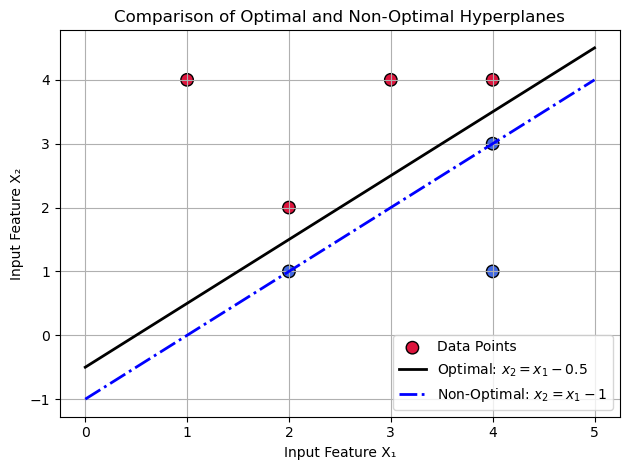

In [84]:



givenData = np.array([[3, 4], [2, 2], [4, 4], [1, 4], [2, 1], [4, 3], [4, 1]])
targetData = np.array([0, 0, 0, 0, 1, 1, 1])  # 0 = red, 1 = blue


x_range = np.linspace(np.min(givenData[:, 0]) - 1, np.max(givenData[:, 0]) + 1, 200)


optLine = x_range - 0.5
nonOptLine = x_range - 1.0


colors = ListedColormap(['crimson', 'royalblue'])


plt.scatter(givenData[:, 0], givenData[:, 1], c=targetData, cmap=colors,
            edgecolor='black', s=80, label='Data Points')

plt.plot(x_range, optLine, color='black', linewidth=2, label='Optimal: $x_2 = x_1 - 0.5$')


plt.plot(x_range, nonOptLine, linestyle='-.', color='blue', linewidth=2,
         label='Non-Optimal: $x_2 = x_1 - 1$')

plt.xlabel('Input Feature X₁')
plt.ylabel('Input Feature X₂')
plt.title('Comparison of Optimal and Non-Optimal Hyperplanes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### h) Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane.

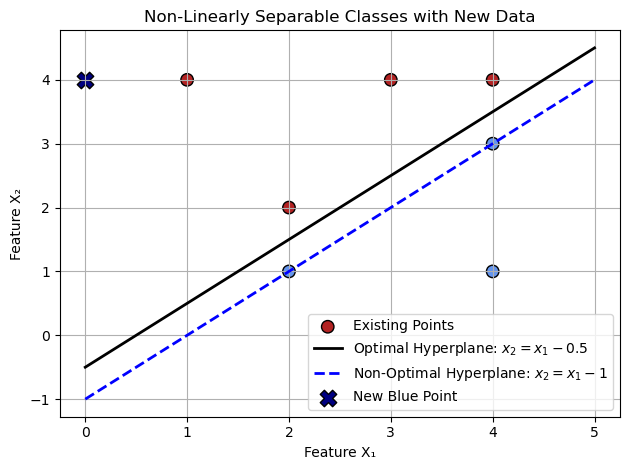

In [86]:



quesPoints = np.array([[3, 4], [2, 2], [4, 4], [1, 4], [2, 1], [4, 3], [4, 1]])
outputGiven = np.array([0, 0, 0, 0, 1, 1, 1])  # 0 = red, 1 = blue

visual = ListedColormap(['firebrick', 'cornflowerblue'])

addInput = np.array([[0, 4]])

x_axisVal = np.linspace(np.min(quesPoints[:, 0]) - 1, np.max(quesPoints[:, 0]) + 1, 200)
bestLine = x_axisVal - 0.5
altLine = x_axisVal - 1.0


plt.scatter(quesPoints[:, 0], quesPoints[:, 1], c=outputGiven, cmap=visual,
            edgecolor='black', s=80, label='Existing Points')


plt.plot(x_axisVal, bestLine, color='black', linewidth=2, label='Optimal Hyperplane: $x_2 = x_1 - 0.5$')
plt.plot(x_axisVal, altLine, linestyle='--', color='blue', linewidth=2, label='Non-Optimal Hyperplane: $x_2 = x_1 - 1$')


plt.scatter(addInput[:, 0], addInput[:, 1], color='navy', marker='X', s=140, edgecolor='black', label='New Blue Point')


plt.xlabel('Feature X₁')
plt.ylabel('Feature X₂')
plt.title('Non-Linearly Separable Classes with New Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### References

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
https://seaborn.pydata.org/generated/seaborn.heatmap.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.tolist.html
https://docs.python.org/3/library/math.html#math.floor
https://docs.python.org/3/library/math.html#math.sqrt
https://seaborn.pydata.org/generated/seaborn.pairplot.html
https://seaborn.pydata.org/generated/seaborn.boxplot.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yscale.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.fit

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.oob_score_

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.oob_score_

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

https://xgboost.readthedocs.io/en/stable/python/python_api/xgboost.XGBClassifier.html#xgboost.XGBClassifier.predict_proba

https://xgboost.readthedocs.io/en/stable/python/python_api/xgboost.XGBClassifier.html#xgboost.XGBClassifier.predict

https://xgboost.readthedocs.io/en/stable/python/python_api/xgboost.XGBClassifier.html#xgboost.XGBClassifier.fit
https://xgboost.readthedocs.io/en/stable/python/python_api/xgboost.XGBClassifier.html